In [2]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

In [3]:
# loading the Iris dataset
from sklearn import datasets
iris = datasets.load_iris()
data, labels = iris.data, iris.target

In [4]:
# initial splitting into training data and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels,
test_size=0.5)

<ipython-input-10-930365d1b63b>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fig.add_subplot(2, n_plots // 2, idx)


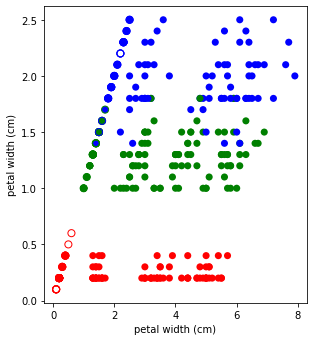

In [10]:
fig = plt.figure(figsize=(16, 12))
n_features = data.shape[-1]
n_plots = 6
idx = 1
cmp = np.array(['r', 'g', 'b'])
for dim1 in range(0, n_features):
    for dim2 in range(dim1+1, n_features):
        fig.add_subplot(2, n_plots // 2, idx)
    plt.scatter(X_train[:, dim1], X_train[:, dim2],c=cmp[y_train],
s=50, edgecolors='none')
plt.scatter(X_test[:, dim1], X_test[:, dim2], c='none', s=50,
edgecolors=cmp[y_test])
plt.xlabel(iris.feature_names[dim1])
plt.ylabel(iris.feature_names[dim2])
idx += 1
plt.show()



QUESTION 01:
Question 1: Why do we have six different point clouds? What does each figure represent?


At its core, a point cloud is a name for a mathematical set, which is an unordered collection of objects. Generally, we think of these objects as a bunch of isolated points in space that are loosely describing some solid structure or surface.

For this classification problem, we will use a MLP with the default values proposed by
scikit-learn for the number of layers (1) and neurons (100).


What is a MLP?
A fully connected multi-layer neural network is called Multi-Layer Perceptron.


In [11]:
 #Usage of MLP
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1, tol=5e-3)

To estimate generalization error, we will use K-fold cross-validation. This will allow us to
adjust, if necessary, the hyperparameters of the decision model. scikit-learn implements
various cross-validation strategies in the sklearn.model_selection module. Let start by
experimenting with the K-fold approach. The KFold object has a .split() method that
generates lists of observation indices to be used for the training subset and for the validation
subset. 

In [12]:
 #KFold for different values of k
from sklearn.model_selection import KFold
# values of k
n_folds = np.array([2, 3, 5, 7, 10, 13, 16, 20])
# preparing lists to store results
cv_scores = []
cv_scores_std = []
for k in n_folds: # for each value of k
    kf = KFold(n_splits=k)
    scores = []
    # learning then evaluating a model on each split
    for train_idx, val_idx in kf.split(X_train):
        # learning with .fit()
        clf.fit(X_train[train_idx], y_train[train_idx])
        scores.append(clf.score(X_train[val_idx], y_train[val_idx]))
    # calculation of the mean and standard deviation of the obtained performances
    cv_scores.append(np.mean(scores))
    cv_scores_std.append(np.std(scores))
cv_scores, cv_scores_std = np.array(cv_scores), np.array(cv_scores_std)
# display average performance +- 1 standard deviation for each k
plt.figure(figsize=(8, 6))

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

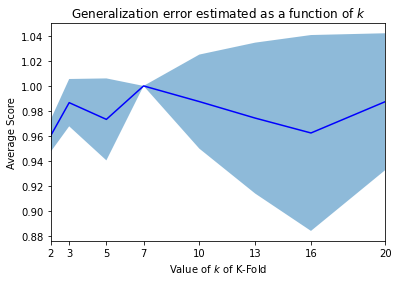

In [13]:
plt.plot(n_folds, cv_scores, 'b')
plt.fill_between(n_folds, cv_scores + cv_scores_std, cv_scores - cv_scores_std,
alpha=0.5)
plt.xlabel("Value of $k$ of K-Fold")
plt.ylabel("Average Score")
plt.xlim(2, max(n_folds))
plt.xticks(n_folds)
plt.title("Generalization error estimated as a function of $k$")
plt.show() 

Question 2: What do you see when looking at this graph? Add values for k (eg 40, 100, be
careful it will take longer…) and examine the graph again.
    
K - Fold Cross 
Validation Technique 


Considering if k= 40

In [15]:
#KFold for different values of k
from sklearn.model_selection import KFold
# values of k
n_folds = np.array([2, 3, 5, 7, 10, 13, 16, 20])
# preparing lists to store results
cv_scores = []
cv_scores_std = []
for k in n_folds: # for each value of k
    kf = KFold(n_splits= 40, shuffle = True)
    scores = []
    # learning then evaluating a model on each split
    for train_idx, val_idx in kf.split(X_train):
        # learning with .fit()
        clf.fit(X_train[train_idx], y_train[train_idx])
        scores.append(clf.score(X_train[val_idx], y_train[val_idx]))
    # calculation of the mean and standard deviation of the obtained performances
    cv_scores.append(np.mean(scores))
    cv_scores_std.append(np.std(scores))
cv_scores, cv_scores_std = np.array(cv_scores), np.array(cv_scores_std)
# display average performance +- 1 standard deviation for each k
plt.figure(figsize=(8, 6))

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

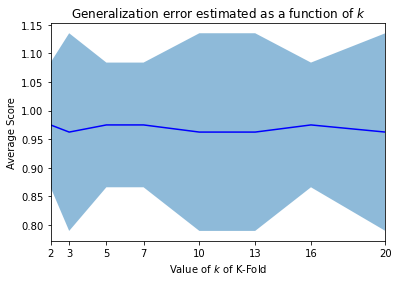

In [16]:
plt.plot(n_folds, cv_scores, 'b')
plt.fill_between(n_folds, cv_scores + cv_scores_std, cv_scores - cv_scores_std,
alpha=0.5)
plt.xlabel("Value of $k$ of K-Fold")
plt.ylabel("Average Score")
plt.xlim(2, max(n_folds))
plt.xticks(n_folds)
plt.title("Generalization error estimated as a function of $k$")
plt.show() 

Considering if k = 10

In [18]:
#KFold for different values of k
from sklearn.model_selection import KFold
# values of k
n_folds = np.array([2, 3, 5, 7, 10, 13, 16, 20])
# preparing lists to store results
cv_scores = []
cv_scores_std = []
for k in n_folds: # for each value of k
    kf = KFold(n_splits= 10, shuffle = True)
    scores = []
    # learning then evaluating a model on each split
    for train_idx, val_idx in kf.split(X_train):
        # learning with .fit()
        clf.fit(X_train[train_idx], y_train[train_idx])
        scores.append(clf.score(X_train[val_idx], y_train[val_idx]))
    # calculation of the mean and standard deviation of the obtained performances
    cv_scores.append(np.mean(scores))
    cv_scores_std.append(np.std(scores))
cv_scores, cv_scores_std = np.array(cv_scores), np.array(cv_scores_std)
# display average performance +- 1 standard deviation for each k
plt.figure(figsize=(8, 6))

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

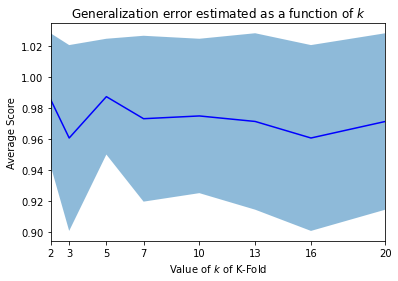

In [19]:
plt.plot(n_folds, cv_scores, 'b')
plt.fill_between(n_folds, cv_scores + cv_scores_std, cv_scores - cv_scores_std,
alpha=0.5)
plt.xlabel("Value of $k$ of K-Fold")
plt.ylabel("Average Score")
plt.xlim(2, max(n_folds))
plt.xticks(n_folds)
plt.title("Generalization error estimated as a function of $k$")
plt.show() 

Considering k = 20 

In [20]:
#KFold for different values of k
from sklearn.model_selection import KFold
# values of k
n_folds = np.array([2, 3, 5, 7, 10, 13, 16, 20])
# preparing lists to store results
cv_scores = []
cv_scores_std = []
for k in n_folds: # for each value of k
    kf = KFold(n_splits= 20, shuffle = True)
    scores = []
    # learning then evaluating a model on each split
    for train_idx, val_idx in kf.split(X_train):
        # learning with .fit()
        clf.fit(X_train[train_idx], y_train[train_idx])
        scores.append(clf.score(X_train[val_idx], y_train[val_idx]))
    # calculation of the mean and standard deviation of the obtained performances
    cv_scores.append(np.mean(scores))
    cv_scores_std.append(np.std(scores))
cv_scores, cv_scores_std = np.array(cv_scores), np.array(cv_scores_std)
# display average performance +- 1 standard deviation for each k
plt.figure(figsize=(8, 6))

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

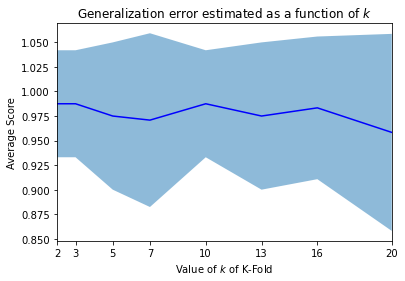

In [21]:
plt.plot(n_folds, cv_scores, 'b')
plt.fill_between(n_folds, cv_scores + cv_scores_std, cv_scores - cv_scores_std,
alpha=0.5)
plt.xlabel("Value of $k$ of K-Fold")
plt.ylabel("Average Score")
plt.xlim(2, max(n_folds))
plt.xticks(n_folds)
plt.title("Generalization error estimated as a function of $k$")
plt.show() 

Question 3: For each model learned by k-fold cross-validation, add its evaluation on the
test data set aside at the start X_test, y_test. Display the curves on the same graph. What
do you notice?

Considering three models:
(1) Logistic Regression
(2) SVM
(3) RandomForest Classifier 


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [23]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

In [24]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [25]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.columns


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [26]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
target = pd.DataFrame( iris.target)
target= target.rename(columns = { 0 : 'target'}) 
target.info()

target.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   target  150 non-null    int32
dtypes: int32(1)
memory usage: 728.0 bytes


target
0         50
1         50
2         50
dtype: int64

In [71]:
target.tail(10)

,target
140,2
141,2
142,2
143,2
144,2
145,2
146,2
147,2
148,2
149,2


In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3)


In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


(a) Implementing Logistic Regression on this data 

In [92]:
lr= LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9428571428571428

(b) Implementing SVM on this data 

In [93]:
svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.9523809523809523

(c) Implementing RandomForestClassifier

In [94]:
rf = RandomForestClassifier(n_estimators = 40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)



0.9333333333333333

In [95]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [96]:
for train_index , test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index,test_index)
    

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [97]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [98]:
get_score(LogisticRegression(), X_train, X_test, y_train, y_test)

0.9428571428571428

In [103]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits = 3)


In [104]:
scores_l = []
scores_svm = []
scores_rf= []

for train_index, test_index in kf.split(iris.data):
    X_train, X_test, y_train, y_test = iris.data[train_index], iris.data[test_index],iris.target[train_index], iris.target[test_index]
    
print(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))  

print(get_score(SVC(), X_train, X_test, y_train, y_test))
print(get_score(RandomForestClassifier(), X_train, X_test, y_train, y_test))
    
    

0.0
0.0
0.0


In [102]:
scores_l = []
scores_svm = []
scores_rf= []

for train_index, test_index in kf.split(iris.data):
    X_train, X_test, y_train, y_test = iris.data[train_index], iris.data[test_index],iris.target[train_index], iris.target[test_index]
        
        
        
print(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))
print(get_score(SVC(), X_train, X_test, y_train, y_test ))
print(get_score(RandomForestClassifier(), X_train, X_test, y_train, y_test))
    

0.0
0.0
0.0


In [105]:
import numpy as np
from sklearn.model_selection import KFold

X = np.array(
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=2)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


In [107]:
import numpy as np
from sklearn.model_selection import KFold

X = iris.data
y = iris.target
kf = KFold(n_splits=2)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74] TEST: [ 75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 1

Question 4: Perform performance estimation using leave one out (LOO) cross-validation.
What do you see comparing the results of k-fold and leave one out?

Model : Logistic Regression 
Perform Leave one Out Cross - Validation as well as K-fold...

In [129]:
#loading necessary libraries'
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd

In [131]:
#define predictor and response variables
X = iris.data
y = iris.target

#define cross-validation method to use
cv = LeaveOneOut()

#build multiple logistic regression model
model = LogisticRegression()

#use LOOCV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
mean(absolute(scores))


#Mean absolute error

0.03333333333333333

In [133]:
#define predictor and response variables
X = iris.data
y = iris.target

#define cross-validation method to use
cv = LeaveOneOut()

#build multiple logistic regression model
model = LogisticRegression()

#use LOOCV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view RMSE
sqrt(mean(absolute(scores)))




0.18257418583505536

In [134]:
#How to perform KFold cross validation for Logistic Regression model with iris data 

In [115]:
#Loading the libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

In [116]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

In [117]:
# 5 folds selected
kfold = KFold(n_splits=5, random_state=0, shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, y, cv=kfold)


In [118]:
# Output the accuracy. Calculate the mean and std across all folds.
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 94.667% (2.667%)


3. Finding the best values for hyperparameters

In [136]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
# loading iris data
from sklearn import datasets
data, labels = datasets.load_iris(return_X_y=True)
# initial splitting into training data and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.5)
# to use MLP
from sklearn.neural_network import MLPClassifier

In [137]:
from sklearn.model_selection import GridSearchCV

In [138]:
tuned_parameters = {'hidden_layer_sizes':[(5,), (20,), (50,), (100,), (150,),
(200,)], 'alpha':[0.001, 0.01, 1, 2]}

In [139]:
clf=GridSearchCV(MLPClassifier(solver='lbfgs',tol=5e-3),tuned_parameters, cv=5)

In [140]:
# grid search execution
clf.fit(X_train, y_train)

C:\Users\Andrea\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Andrea\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Andrea\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of 

GridSearchCV(cv=5, estimator=MLPClassifier(solver='lbfgs', tol=0.005),
             param_grid={'alpha': [0.001, 0.01, 1, 2],
                         'hidden_layer_sizes': [(5,), (20,), (50,), (100,),
                                                (150,), (200,)]})

In [141]:
print(clf.best_params_)

{'alpha': 1, 'hidden_layer_sizes': (150,)}


We can also do a more comprehensive display, plotting the surface of the average score of
the different models as a function of the combination of the two hyperparameters:

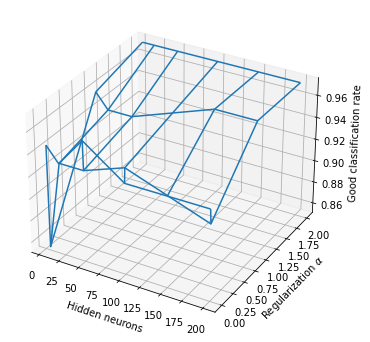

In [144]:
n_hidden=np.array([s[0]for s in tuned_parameters['hidden_layer_sizes']])
alphas = np.array(tuned_parameters['alpha'])
# creating the hyperparameter grid
xx, yy = np.meshgrid(n_hidden, alphas)
scores = clf.cv_results_['mean_test_score'].reshape(xx.shape)
# wireframe display of the results of the evaluated models
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
ax.set_xlabel("Hidden neurons")
ax.set_ylabel("Regularization $\\alpha$")
ax.set_zlabel("Good classification rate ")
ax.plot_wireframe(xx, yy, scores)
plt.show()

Question 5: How many MLPs are learned in total in this example?

Changing the paramater value for the MLPClassifier ?
In the below example, the values for the hidden_layer_size are changed and the results are produced below 

In [2]:
# importing libraries

import numpy as np
import matplotlib.pyplot as plt
# loading iris data
from sklearn import datasets
data, labels = datasets.load_iris(return_X_y=True)
# initial splitting into training data and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.5)
# to use MLP
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
# Chnaging the values of the parameters:
tuned_parameters = {'hidden_layer_sizes':[(7,), (27,), (58,), (105,), (160,),
(210,)], 'alpha':[0.001, 0.01, 1, 2]}

In [4]:
clf=GridSearchCV(MLPClassifier(solver='lbfgs',tol=5e-3),tuned_parameters, cv=5)

In [5]:
# grid search execution
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(solver='lbfgs', tol=0.005),
             param_grid={'alpha': [0.001, 0.01, 1, 2],
                         'hidden_layer_sizes': [(7,), (27,), (58,), (105,),
                                                (160,), (210,)]})

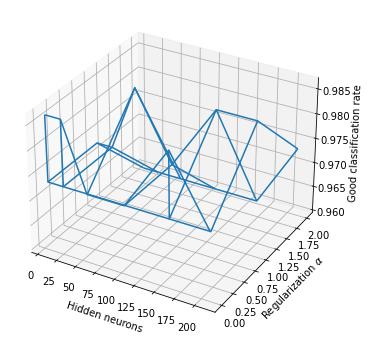

In [6]:
n_hidden=np.array([s[0]for s in tuned_parameters['hidden_layer_sizes']])
alphas = np.array(tuned_parameters['alpha'])
# creating the hyperparameter grid
xx, yy = np.meshgrid(n_hidden, alphas)
scores = clf.cv_results_['mean_test_score'].reshape(xx.shape)
# wireframe display of the results of the evaluated models
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))


ax = plt.axes(projection='3d')
ax.set_xlabel("Hidden neurons")
ax.set_ylabel("Regularization $\\alpha$")
ax.set_zlabel("Good classification rate ")
ax.plot_wireframe(xx, yy, scores)
plt.show()

In [7]:
print(clf.best_params_)

{'alpha': 0.001, 'hidden_layer_sizes': (7,)}


In [8]:
#Changing the values of the parameters again :
# importing libraries

import numpy as np
import matplotlib.pyplot as plt
# loading iris data
from sklearn import datasets
data, labels = datasets.load_iris(return_X_y=True)
# initial splitting into training data and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.5)
# to use MLP
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [111]:
# Changing the values of the parameters:
tuned_parameters = {'hidden_layer_sizes':[(9,), (26,), (55,), (100,), (140,),
(210,)], 'alpha':[0.001, 0.01, 1, 2]}

In [12]:
clf=GridSearchCV(MLPClassifier(solver='lbfgs',tol=5e-3),tuned_parameters, cv=5)

In [13]:
# grid search execution
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(solver='lbfgs', tol=0.005),
             param_grid={'alpha': [0.001, 0.01, 1, 2],
                         'hidden_layer_sizes': [(9,), (26,), (55,), (100,),
                                                (140,), (210,)]})

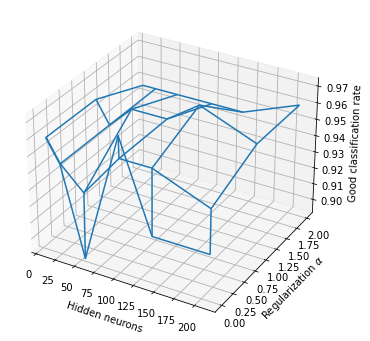

In [14]:
n_hidden=np.array([s[0]for s in tuned_parameters['hidden_layer_sizes']])
alphas = np.array(tuned_parameters['alpha'])
# creating the hyperparameter grid
xx, yy = np.meshgrid(n_hidden, alphas)
scores = clf.cv_results_['mean_test_score'].reshape(xx.shape)
# wireframe display of the results of the evaluated models
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
ax.set_xlabel("Hidden neurons")
ax.set_ylabel("Regularization $\\alpha$")
ax.set_zlabel("Good classification rate ")
ax.plot_wireframe(xx, yy, scores)
plt.show()

In [15]:
print(clf.best_params_)

{'alpha': 0.001, 'hidden_layer_sizes': (100,)}


Question 6: What is the meaning of the refit parameter of GridSearchCV

When the refit is given as refit = True, sklearn uses the entire training set to refit the model. So, there is no test data left in order to estimate the performance using any scorer function.

Question 7: Take a more complete look at the contents of clf.cv_results_

In [16]:
print(clf.cv_results_)

{'mean_fit_time': array([0.01404805, 0.02195454, 0.03456259, 0.01569943, 0.05002503,
       0.06277366, 0.02512336, 0.01883636, 0.02840867, 0.03966727,
       0.04751287, 0.06580839, 0.02510037, 0.0314312 , 0.02821536,
       0.03406215, 0.04079604, 0.03806643, 0.02464275, 0.02509193,
       0.03507972, 0.04054179, 0.04454641, 0.05565329]), 'std_fit_time': array([0.00765409, 0.02351278, 0.02306537, 0.01111752, 0.03337768,
       0.02630912, 0.00995783, 0.0117888 , 0.01545971, 0.02598455,
       0.02181611, 0.04526899, 0.00865931, 0.00524517, 0.00630108,
       0.00740286, 0.00761859, 0.00598869, 0.00698838, 0.00773447,
       0.01089635, 0.00656888, 0.00673792, 0.00860778]), 'mean_score_time': array([0.        , 0.00312419, 0.00312405, 0.        , 0.0031311 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00333714, 0.        , 0.        , 0.        ,
       0.00039854, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00019946

Question 8: Evaluate the selected model on the test data (X_test, y_test)
#Let us perform RandomForest on the data using gridsearch?


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
rfc=RandomForestClassifier(random_state=42)

In [40]:
param_grid = { 
    'n_estimators': [250, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,7,8,9,11],
    'criterion' :['gini', 'entropy']
}

In [51]:
cv_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
cv_rfc.fit(X_train, y_train)

C:\Users\Andrea\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Andrea\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Andrea\anaconda3\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Andrea\anaconda3\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Andrea\anaconda3\lib\site-p

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 7, 8, 9, 11],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [250, 500]})

In [52]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 250}

In [65]:
rfc01=RandomForestClassifier(random_state=42, max_features= 'sqrt' , n_estimators= 250, max_depth= 4, criterion='gini')

In [66]:

rfc01.fit(X_train, y_train)


RandomForestClassifier(max_depth=4, n_estimators=250, random_state=42)

In [67]:
pred=rfc01.predict(X_test)

In [68]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  1.0


Question 9: Do the appearance of the results encourage you to refine the grid? Edit the
grid and review the new results.

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [70]:
rfc=RandomForestClassifier(random_state=42)

In [71]:
param_grid = { 
    'n_estimators': [100, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [6,9,12,15,18],
    'criterion' :['gini', 'entropy']
}

In [74]:
cv_rfc2 = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
cv_rfc2.fit(X_train, y_train)

C:\Users\Andrea\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Andrea\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Andrea\anaconda3\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Andrea\anaconda3\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Andrea\anaconda3\lib\site-p

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 9, 12, 15, 18],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 500]})

In [76]:
cv_rfc2.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [78]:
rfc02=RandomForestClassifier(random_state=42, max_features= 'sqrt' , n_estimators= 100, max_depth=6, criterion='gini')

In [79]:
rfc02.fit(X_train, y_train)


RandomForestClassifier(max_depth=6, random_state=42)

In [80]:
pred=rfc02.predict(X_test)

In [81]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  1.0


Question 10: Use randomized search with RandomizedSearchCV. The “cost” (total
number of evaluated combinations) can be set with n_iter. Explain the choice of the laws
used for drawing the values of the two (hyper)parameters hidden_layer_sizes and alpha.

In [119]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
iris = load_iris()
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=100,
                              random_state=0)
distributions = dict(C=uniform(loc=0, scale=4),
                     penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0)



In [120]:
search = clf.fit(iris.data, iris.target)

In [121]:
search.best_params_

{'C': 2.195254015709299, 'penalty': 'l1'}

Question 11: Experiment with HalvingGridSearchCV. Compare the final score and the
calculation time with that obtained with GridSearchCV.

In [105]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv  
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
clf = RandomForestClassifier(random_state=0)

param_grid = {"max_depth": [7, 9, 11, 15],
              "min_samples_split": [3, 5]}
search = HalvingGridSearchCV(clf, param_grid, resource='n_estimators',
                              max_resources=10,
                              random_state=0).fit(X, y)



In [106]:
search.best_params_  

{'max_depth': 11, 'min_samples_split': 5, 'n_estimators': 9}

In [107]:
rfc_x= RandomForestClassifier(random_state= 0, n_estimators= 9 , max_depth=11, min_samples_split= 5)

In [108]:
rfc_x.fit(X_train, y_train)

RandomForestClassifier(max_depth=11, min_samples_split=5, n_estimators=9,
                       random_state=0)

In [109]:
y_pred=rfc_x.predict(X_test)

In [110]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  1.0
